# Project Title - Data Science Enthusiast

Since its difficult in India to get a job as a fresher in field of data.
With the help of two different datasets taken from kaggle as described:

   1.https://www.kaggle.com/datasets/madhurpant/data-science-jobs-in-india (this is the data taken from Ambition Box's     website)
   2.https://www.kaggle.com/datasets/anandhuh/data-science-jobs-in-india (this is the data taken from Naukri.com ( an       Indian employment website operating in India and Middle East))

An effort is made here, towards grabing as much details/information as possible ,so that freshers can have the enough
knowledge to choose the right companies and the right roles to make a target for.
And also in order to grab a confidence in freshers for opting data as a carrer.

This project consists of the use of python programming language ,numpy ,pandas ,matplotlib and seaborn libraries inspired by the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), which made me learn python programming language from the basics, followed by numpy array operations, analyzing tabular data with pandas ,visualizations with seaborn and matplotlib along with good sets of examples and assignments and motivated me to go for an interesting case study like this.


### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Datasets are downloaded through kaggle using opendatasets Python Library

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/datasets/madhurpant/data-science-jobs-in-india'
dataset_url_naukri = 'https://www.kaggle.com/datasets/anandhuh/data-science-jobs-in-india'

In [3]:
import opendatasets as od
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rani111
Your Kaggle Key: ········


100%|██████████| 25.2k/25.2k [00:00<00:00, 16.6MB/s]

The dataset has been downloaded and extracted.

In [4]:
od.download(dataset_url_naukri,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rani111
Your Kaggle Key: ········


100%|██████████| 480k/480k [00:00<00:00, 131MB/s]

In [5]:

data_dir = './data-science-jobs-in-india'

In [6]:
import os
os.listdir(data_dir)


['naukri_data_science_jobs_india.csv', 'Data_Science_Jobs_in_India.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "data-science-enthusiast" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shikhaoj/data-science-enthusiast" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shikhaoj/data-science-enthusiast


'https://jovian.com/shikhaoj/data-science-enthusiast'

## Data Preparation and Cleaning

Since we want a generalized and more accurate data , we'll be merging two datasets collected from different job portals/websites.While the process we'll trying

  - to clean and prepare datasets individually(in order to remove NAN values or mistaks in data entry(if any))
  - and finally merge them together

In [11]:
import pandas as pd

In [12]:
data_science_naukri=pd.read_csv("data-science-jobs-in-india/naukri_data_science_jobs_india.csv")

#### Extracting some of the information regarding the datasest of kaggle collection from naukri.com

In [13]:
data_science_naukri.shape

(12000, 5)

#### From the below detail obtained we can see that non of columns includes NAN values, so we no need to remove them seperately.


In [14]:
data_science_naukri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Role            12000 non-null  object
 1   Company             12000 non-null  object
 2   Location            12000 non-null  object
 3   Job Experience      12000 non-null  object
 4   Skills/Description  12000 non-null  object
dtypes: object(5)
memory usage: 468.9+ KB



#### Here we can see non of the minimum values of the numerical columns is negative , so there is no mistake in the data entry , hence we no need to deal with it.

In [15]:
data_science_naukri.describe()

,Job_Role,Company,Location,Job Experience,Skills/Description
count,12000,12000,12000,12000,12000
unique,6563,3507,822,143,11356
top,Data Engineer,Accenture,Bangalore/Bengaluru,5-10,"Computer science, Manager Quality Assurance, F..."
freq,580,490,3383,944,8


#### A copy of naukri dataset is stored , for our cleaning ,merging and analysis so that we can perform our task without disturbing the original dataset

In [16]:
data_science_naukri_df=data_science_naukri.copy()

In [17]:
data_science_naukri_df

,Job_Role,Company,Location,Job Experience,Skills/Description
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea..."
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,..."
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man..."
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a..."
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn..."
...,...,...,...,...,...
11995,Tech Lead/Architect ( Contractual ),Krazy Mantra HR Solutions Pvt. Ltd,"Kolkata, Chennai, Bangalore/Bengaluru",8-13,"Spark, Python, S3, lambda, Athena, AWS, IT Ski..."
11996,Tech Lead / POD Lead,cliqhr.com,"Hyderabad/Secunderabad, Pune, Bangalore/Bengaluru",10-12,"AirFlow, BigQuery, GCS, Kafka, Java, Shell scr..."
11997,Java Full Stack Developer - Hibernate / Spring,Serving Skill,"Hyderabad/Secunderabad, Bangalore/Bengaluru",2-5,"IT Skills, Java, Software Development, Testing..."
11998,Tech Lead - Azure,cliqhr.com,"Kochi/Cochin, Mumbai, Hyderabad/Secunderabad, ...",8-10,"PowerShell, Azure Data Factory, Azure, PaaS, M..."


In [18]:
data_science_ambition=pd.read_csv("data-science-jobs-in-india/Data_Science_Jobs_in_India.csv")

#### Extracting some of the information regarding the dataset of kaggel collected from Ambition Box's website

In [19]:
data_science_ambition.shape

(1602, 8)

#### From the below detail obtained we can see non of the columns includes NAN values, we no need to remove them seperately.

In [20]:
data_science_ambition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1602 non-null   int64 
 1   company_name     1602 non-null   object
 2   job_title        1602 non-null   object
 3   min_experience   1602 non-null   int64 
 4   avg_salary       1602 non-null   object
 5   min_salary       1602 non-null   object
 6   max_salary       1602 non-null   object
 7   num_of_salaries  1602 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 100.2+ KB


In [21]:
data_science_ambition.describe()

,Unnamed: 0,min_experience,num_of_salaries
count,1602.000000,1602.000000,1602.000000
mean,800.500000,2.799001,58.055556
std,462.601881,2.353686,169.042138
min,0.000000,0.000000,3.000000
25%,400.250000,1.000000,9.250000
50%,800.500000,2.000000,22.000000
75%,1200.750000,4.000000,47.000000
max,1601.000000,21.000000,4200.000000


#### A copy of ambition box's website dataset is stored , for our cleaning ,merging and analysis so that we can perform our task without disturbing the original dataset.

In [22]:
data_science_ambition_df=data_science_ambition.copy()

#### We would like to convert some more columns as numeric ones which would help us in better analysis.

In [23]:
data_science_ambition_df['avg_salary'] = pd.to_numeric(data_science_ambition['avg_salary'].str.replace('L',''))
data_science_ambition_df['min_salary'] = pd.to_numeric(data_science_ambition['min_salary'].str.replace('L',''))
data_science_ambition_df['max_salary'] = pd.to_numeric(data_science_ambition['max_salary'].str.replace('L',''))

In [24]:
data_science_ambition_df.describe()

,Unnamed: 0,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
count,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,800.500000,2.799001,13.234894,8.634145,19.143258,58.055556
std,462.601881,2.353686,7.840744,5.796976,11.150180,169.042138
min,0.000000,0.000000,1.400000,0.200000,2.000000,3.000000
25%,400.250000,1.000000,7.600000,4.400000,12.000000,9.250000
50%,800.500000,2.000000,11.900000,7.000000,18.000000,22.000000
75%,1200.750000,4.000000,17.175000,11.500000,24.000000,47.000000
max,1601.000000,21.000000,82.000000,55.000000,102.000000,4200.000000


In [25]:
data_science_ambition_df

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,0,TCS,Data Scientist,2,7.8,4.5,16.0,841
1,1,Accenture,Data Scientist,2,12.8,5.8,23.0,501
2,2,IBM,Data Scientist,2,13.4,5.3,25.0,394
3,3,Cognizant,Data Scientist,2,9.8,5.0,18.0,318
4,4,Capgemini,Data Scientist,2,8.6,4.8,14.6,300
...,...,...,...,...,...,...,...,...
1597,1597,Collabera Technologies,Data Architect,8,17.0,12.0,23.1,4
1598,1598,Coforge,Data Architect,7,27.1,18.5,39.0,4
1599,1599,Hitachi,Data Architect,21,40.0,25.0,50.0,3
1600,1600,GE Power,Data Architect,7,16.7,14.9,19.0,3


#### Here we are cleaning  our ambition box's dataset by dropping an unwanted column 'Unnamed'

In [26]:
data_science_ambition_df=data_science_ambition_df.drop(['Unnamed: 0'],axis=1)

#### Here we are preparing the data by merging the two datasets in order to provide more precise and accurate data for Indian data enthusiats.
  * In order to merge the data we renaming the columns 'company_name' and 'job_title', the columns on which the           merging has to be done.

In [27]:
data_science_ambition_df.rename(columns={'company_name':'Company','job_title':'Job_Role'},inplace=True)

In [28]:
data_science_ambition_df

,Company,Job_Role,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,TCS,Data Scientist,2,7.8,4.5,16.0,841
1,Accenture,Data Scientist,2,12.8,5.8,23.0,501
2,IBM,Data Scientist,2,13.4,5.3,25.0,394
3,Cognizant,Data Scientist,2,9.8,5.0,18.0,318
4,Capgemini,Data Scientist,2,8.6,4.8,14.6,300
...,...,...,...,...,...,...,...
1597,Collabera Technologies,Data Architect,8,17.0,12.0,23.1,4
1598,Coforge,Data Architect,7,27.1,18.5,39.0,4
1599,Hitachi,Data Architect,21,40.0,25.0,50.0,3
1600,GE Power,Data Architect,7,16.7,14.9,19.0,3


In [29]:
data_science_jobs_india=data_science_naukri_df.merge(data_science_ambition_df,on=['Job_Role','Company'])

In [30]:
data_science_jobs_india

,Job_Role,Company,Location,Job Experience,Skills/Description,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,...",5,43.0,30.0,65.0,32
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-10,"IT Skills, Testing, Data Science, Machine Lear...",5,43.0,30.0,65.0,32
2,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"IT Skills, Python, Data Science, Machine Learn...",5,43.0,30.0,65.0,32
3,Senior Data Scientist,Walmart,Bangalore/Bengaluru,9-12,"Unix, Supply chain, Linux, Machine learning, S...",5,43.0,30.0,65.0,32
4,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Procurement, Computer science, Cloud computing...",5,43.0,30.0,65.0,32
...,...,...,...,...,...,...,...,...,...,...
167,Business Analyst,Ameriprise Financial,Gurgaon/Gurugram,1-3,"Automation, Business Analyst, MS Access, Proje...",1,5.9,3.9,9.3,39
168,Business Analyst,Ameriprise Financial,Noida,2-4,"operational support, Data management, Architec...",1,5.9,3.9,9.3,39
169,Business Analyst,Shell,Bengaluru,10-15,"SAP PM, IDMS, HP data protector, Biztalk, Sche...",4,19.5,12.0,30.0,258
170,Business Analyst,Shell,Bangalore/Bengaluru,2-7,"Quantity Conversions, SAP IS, Hydrocarbon Prod...",4,19.5,12.0,30.0,258


#### Extracting the information regarding the merged data.

In [31]:
data_science_jobs_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job_Role            172 non-null    object 
 1   Company             172 non-null    object 
 2   Location            172 non-null    object 
 3   Job Experience      172 non-null    object 
 4   Skills/Description  172 non-null    object 
 5   min_experience      172 non-null    int64  
 6   avg_salary          172 non-null    float64
 7   min_salary          172 non-null    float64
 8   max_salary          172 non-null    float64
 9   num_of_salaries     172 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 14.8+ KB


#### Since non of the numerical data is negative , we no need to further clean the merged data , after converting some additional attributes as a numeric attribute.

In [32]:
data_science_jobs_india.describe()

,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,2.587209,16.488953,10.213372,24.298256,98.488372
std,2.019918,10.731581,7.811575,14.694628,153.014676
min,0.000000,3.100000,1.800000,4.200000,4.000000
25%,1.000000,9.675000,4.800000,15.500000,20.000000
50%,2.000000,13.400000,7.800000,21.000000,39.500000
75%,3.000000,20.400000,14.000000,27.500000,98.000000
max,14.000000,82.000000,55.000000,100.000000,727.000000


In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shikhaoj/data-science-enthusiast" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shikhaoj/data-science-enthusiast


'https://jovian.com/shikhaoj/data-science-enthusiast'

## Exploratory Analysis and Visualization

Before moving forward , and asking question which could genuinely, help an indian data enthuaist to make a good decision regarding opting data as a carrer as a fresher, let's perform some basic analysis on data with the help of suitable visualization graphs.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Let us first find out total number of unique companies in our dataset
**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [36]:
data_science_jobs_india.Company.nunique()

57

#### There are 57 companies providing opportunities in the field of data in india as listed below.

In [37]:
Companies_offering_data_jobs=data_science_jobs_india.Company.unique()
Companies_offering_data_jobs

array(['Walmart', 'Ericsson', 'Genpact', 'PayPal', 'Applied Materials',
       'Course5', 'IBM', 'Amdocs', 'Capgemini', 'Flipkart',
       'Wolters Kluwer', 'Philips', 'Optum', 'Scienaptic Systems',
       'Confidential', 'Oracle', 'Siemens', 'Shell', 'Tiger Analytics',
       'Thomson Reuters', 'Cerner', 'Visa', 'Uber', 'Landis+Gyr',
       'Dun & Bradstreet', 'NTT DATA', 'UnitedLex', 'Myntra', 'Wipro',
       'Schneider Electric', 'Baker Hughes', 'Nokia', 'Google', 'Cyient',
       'News Technology Services', 'Target', 'Morgan Stanley',
       'HCL Technologies', 'Brillio', 'Birlasoft', 'Enquero', 'Red Hat',
       'Adidas', 'Nisum Technologies', 'Apisero', 'Paytm',
       'Data Semantics', 'ValueLabs', 'UST', 'Kyndryl',
       'Saama Technologies', 'Advance Auto Parts', 'BA Continuum',
       'Xoriant', 'Amazon', 'BNP Paribas', 'Ameriprise Financial'],
      dtype=object)

In [113]:
# Top average salary offering companies
top_max_avg_salary_companies=data_science_jobs_india.sort_values(by=['avg_salary'],ascending=False).head(20)

top_max_avg_salary_companies

,Job_Role,Company,Location,Job Experience,Skills/Description,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
33,Senior Data Scientist,Flipkart,Bangalore/Bengaluru,5-8,"deep learning, Statistical analysis, data scie...",5,82.0,55.0,100.0,5
64,Senior Data Engineer,Uber,Bangalore/Bengaluru,1-5,"Daily accounting, Data modeling, SCALA, Agile,...",7,66.3,34.5,93.0,5
103,Data Engineer,Google,Bengaluru,1-3,"IT Skills, Python, Software Development, Data ...",3,45.3,16.5,93.5,16
0,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,...",5,43.0,30.0,65.0,32
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-10,"IT Skills, Testing, Data Science, Machine Lear...",5,43.0,30.0,65.0,32
2,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"IT Skills, Python, Data Science, Machine Learn...",5,43.0,30.0,65.0,32
4,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Procurement, Computer science, Cloud computing...",5,43.0,30.0,65.0,32
3,Senior Data Scientist,Walmart,Bangalore/Bengaluru,9-12,"Unix, Supply chain, Linux, Machine learning, S...",5,43.0,30.0,65.0,32
139,Data Architect,Shell,Bangalore/Bengaluru,6-11,"Azure Databricks, Enterprise Architecture, Dat...",14,35.7,33.6,38.0,4
140,Data Architect,Shell,Bangalore/Bengaluru,3-8,"Azure PaaS, Enterprise Architecture, Data Qual...",14,35.7,33.6,38.0,4


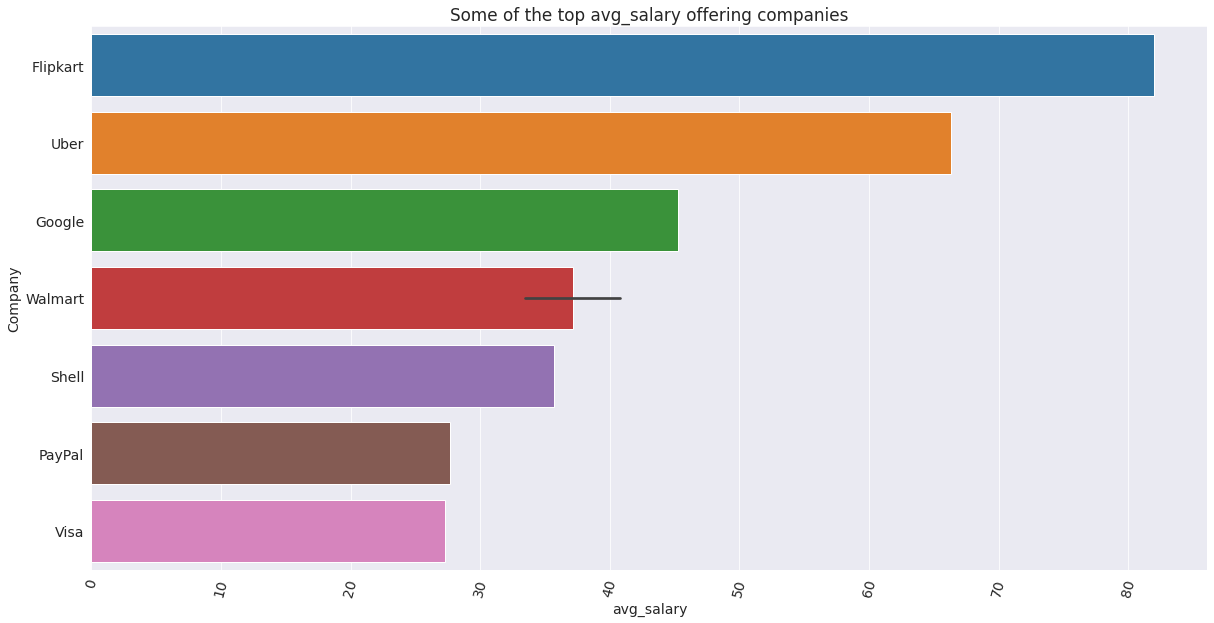

In [39]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
plt.title('Some of the top avg_salary offering companies')
sns.barplot(y=top_max_avg_salary_companies.Company, x=top_max_avg_salary_companies.avg_salary);

#### We can see from the above graph that flipkart is one of the highly paying company with an average salary of more than 80 lakhs in the field of data.

In [114]:
# Number of jobs as per the role in the field of data
No_of_unique_job_roles=data_science_jobs_india.groupby('Job_Role')['num_of_salaries'].sum()
No_of_unique_job_roles

Job_Role
Business Analyst           4158
Data Analyst               2912
Data Architect               13
Data Engineer              3322
Data Scientist             4823
Senior Business Analyst     640
Senior Data Analyst         219
Senior Data Engineer        633
Senior Data Scientist       220
Name: num_of_salaries, dtype: int64

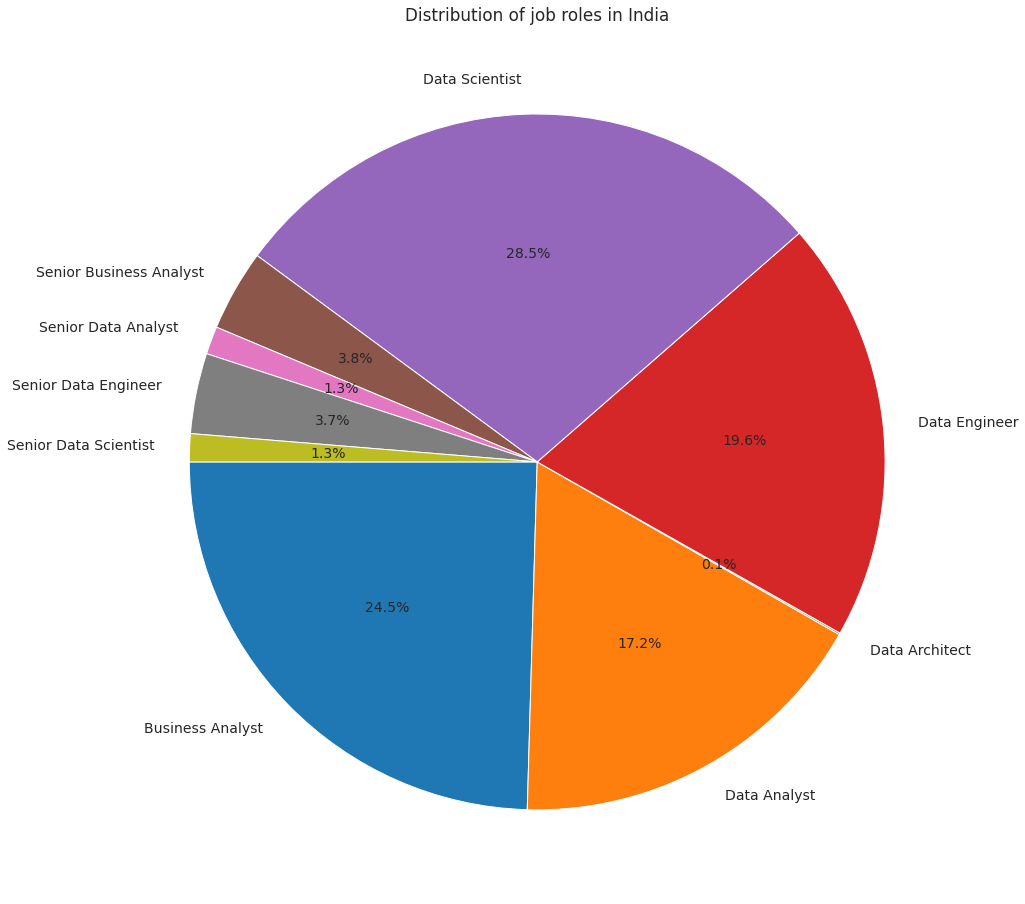

In [41]:
plt.figure(figsize=(20,16))
plt.title('Distribution of job roles in India')
plt.pie(No_of_unique_job_roles, labels=No_of_unique_job_roles.index, autopct='%1.1f%%', startangle=180);

#### From the above pie chart we can analyse that within the field of data , maximum job are offered for the role data scientist,followed by business analyst,then data engineer and data analyst and so on.

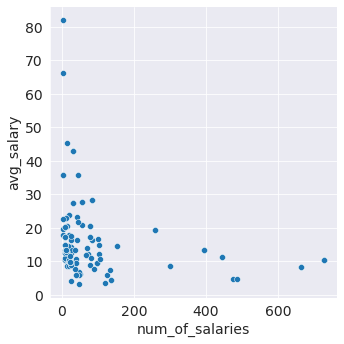

In [42]:
sns.relplot(data=data_science_jobs_india,x="num_of_salaries",y="avg_salary")

#### From the above graph , we can interpret that most of the jobs lie within the average salary 30 lakhs , with companies having number of employees mostly within 200.

In [43]:
Location_with_max_no_of_data_jobs=data_science_jobs_india.groupby('Location')['num_of_salaries'].sum().to_frame().sort_values(["num_of_salaries"],ascending=False)
Location_with_max_no_of_data_jobs

,num_of_salaries
Location,
Bangalore/Bengaluru,10473
Gurgaon/Gurugram,1228
Hyderabad/Secunderabad,1098
Kochi/Cochin,788
Chennai,732
Pune,627
"Hyderabad/Secunderabad, Pune, Chennai",475
Noida,428
Bengaluru,372


Text(0.5, 1.0, 'Job Distribution As Per The Location')

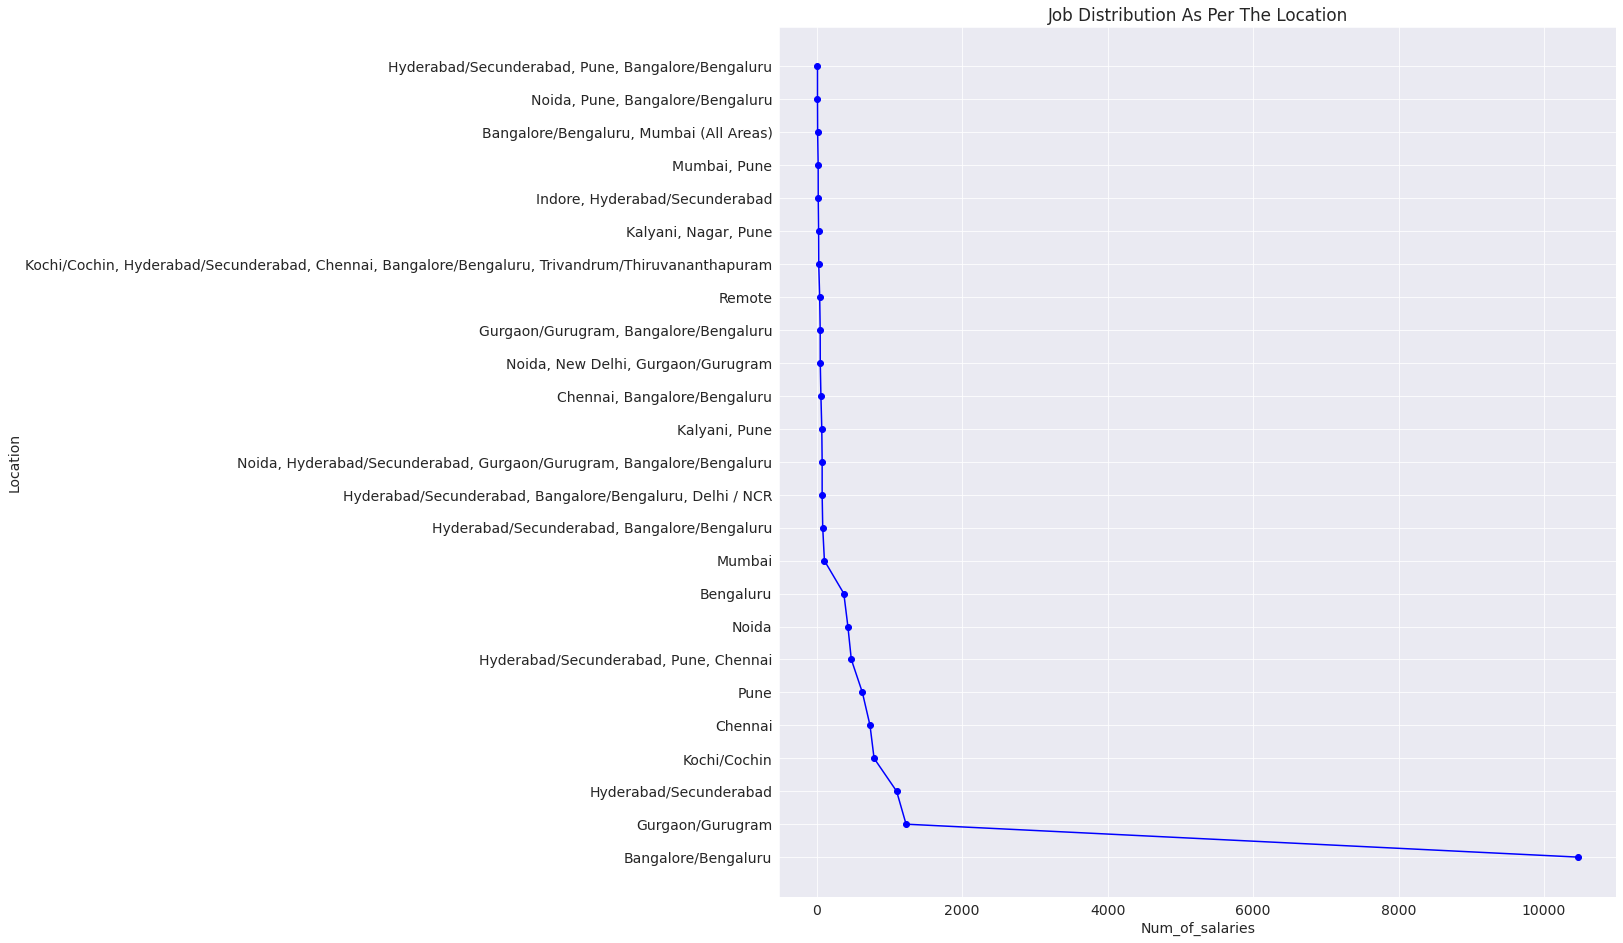

In [44]:
plt.figure(figsize=(15,16))
#sns.set_style("whitegrid")
plt.plot(Location_with_max_no_of_data_jobs.num_of_salaries, Location_with_max_no_of_data_jobs.index, 'o-b')

plt.xlabel('Num_of_salaries')
plt.ylabel('Location')

plt.title("Job Distribution As Per The Location")

#### From the above graph , we can interpret that maximum number of jobs related to data are in Bengaluru followed by Gurgaon and Hyderabad.

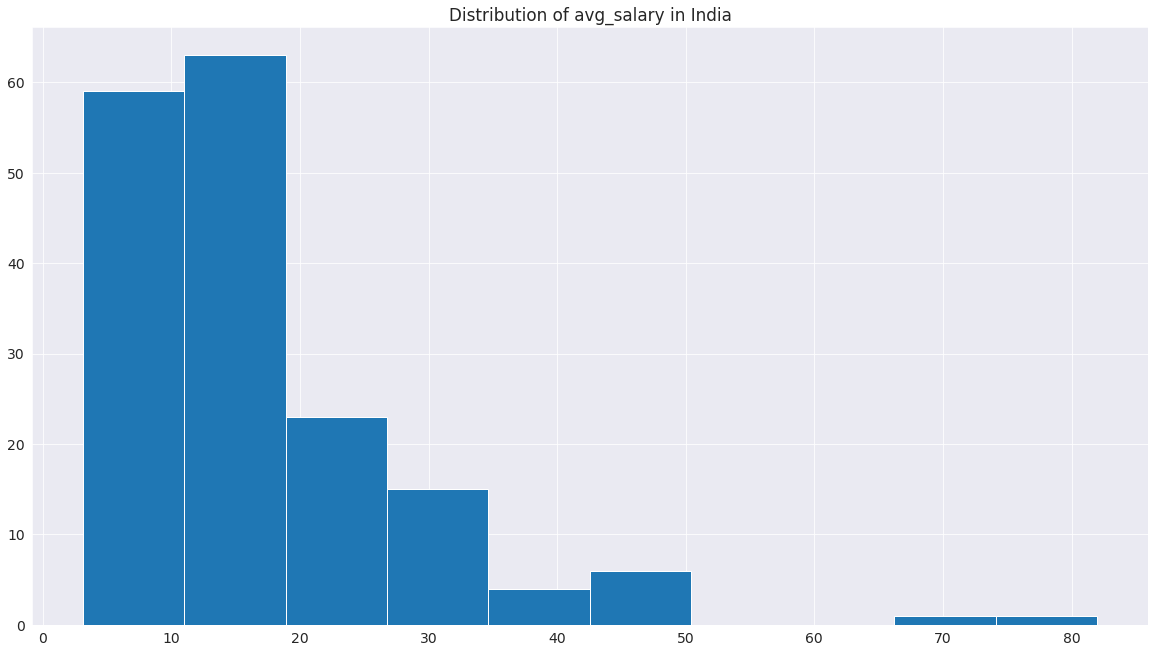

In [45]:
plt.figure(figsize=(20,11))
plt.title('Distribution of avg_salary in India')
plt.hist(data_science_jobs_india.avg_salary, bins=10);

#### From the above distribution graph , we can interpret that maximum number of employees average salary lies within 20 lakhs.

Let us save and upload our work to Jovian before continuing

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shikhaoj/data-science-enthusiast" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shikhaoj/data-science-enthusiast


'https://jovian.com/shikhaoj/data-science-enthusiast'

## Asking and Answering Questions

We already have gained some of the information regarding the field of data in India for data enthusiasts.Now, we will try asking some of the questions among ourselves that could help a fresher to decide to make a decision regarding opting data as a carrer.



#### Q1: How many companies are offering jobs to a fresher or an year experienced in the field of data?

In [48]:
No_of_companies_for_freshers=len(data_science_jobs_india[data_science_jobs_india['min_experience']<2]) 
No_of_companies_for_freshers

54

#### There are 54 companies in India giving jobs in the field of data with min_experience of less than 2 years, seems to be a good number.

#### Q2: Which job roles of data are available for fresher or an year experienced?

In [112]:
Job_roles_for_freshers=data_science_jobs_india[data_science_jobs_india['min_experience']<2][["Job_Role","min_experience"]]
Job_roles_for_freshers

,Job_Role,min_experience
34,Data Scientist,0
35,Data Scientist,0
36,Data Scientist,0
40,Data Scientist,1
48,Data Scientist,0
66,Data Analyst,1
68,Data Analyst,1
74,Data Analyst,1
75,Data Analyst,1
76,Data Analyst,1


#### Apart from senior data roles or data architect , a fresher or an year experienced has an opportunity to opt for any of the data role.

#### Q3: What are the job roles expecting minimum experience with maximum average salary ?

In [50]:
Job_roles_with_minimum_experience_and_maximum_average_salary= data_science_jobs_india[data_science_jobs_india["min_experience"]<2].sort_values(by=["min_experience","avg_salary"],ascending=[True,False])[["Job_Role","min_experience","avg_salary"]]
Job_roles_with_minimum_experience_and_maximum_average_salary

,Job_Role,min_experience,avg_salary
48,Data Scientist,0,14.6
34,Data Scientist,0,12.5
35,Data Scientist,0,12.5
36,Data Scientist,0,12.5
114,Data Engineer,0,7.7
104,Data Analyst,0,4.6
122,Data Engineer,1,23.0
123,Data Engineer,1,23.0
68,Data Analyst,1,17.2
118,Data Engineer,1,17.2


#### From the above analysis , we could see that even a completely 0 experienced candidate could also grab a job as a data scientist with an average salary of 14.6 Lakhs and one with an experience atleast 1 year could also grab a job upto an average salary of 23 lakhs as a data engineer.
#### Seems that data field also have a good scope for freshers.

#### Q4 Which companies are providing maximum number of job in the field of data?

In [51]:
No_of_jobs_offered_by_companies=data_science_jobs_india.groupby('Company')['num_of_salaries'].sum().to_frame().sort_values(["num_of_salaries"],ascending=False).head(10)
No_of_jobs_offered_by_companies

,num_of_salaries
Company,
IBM,6531
Capgemini,1385
Myntra,1176
Shell,1128
Amazon,890
Flipkart,793
Walmart,503
Wipro,475
Ericsson,470


#### From the above , we could see that IBM , followed by Capgemini ,Myntra ,Shell, Amazon, Flipkart ,Walmart etc are the companies providing maximum number of jobs in the field of data.

#### Q5: What are the total number of jobs available for all the freshers or an year experienced in India?

In [52]:
Total_number_of_jobs_for_freshers=data_science_jobs_india[data_science_jobs_india["min_experience"]<2]["num_of_salaries"].sum()
Total_number_of_jobs_for_freshers

6015

#### There are total 6,015 jobs available in India for freshers or those who has an experience of only an year.

#### Q6: What are the companies providing maximum number of jobs for freshers or an year experienced?

In [53]:
No_of_jobs_offered_by_companies_for_freshers=data_science_jobs_india[data_science_jobs_india["min_experience"]<2].groupby('Company')['num_of_salaries'].sum().to_frame().sort_values(["num_of_salaries"],ascending=False).head(10)
No_of_jobs_offered_by_companies_for_freshers

,num_of_salaries
Company,
IBM,2181
Myntra,1176
Capgemini,485
Wipro,475
NTT DATA,276
Shell,237
Cyient,119
Flipkart,103
Paytm,89


#### From the above analysis we have IBM followed by Myntra, Capgemini and Wipro etc as the companies which are providing highest number of jobs in the field of data.

#### Q7: How dependent is the average salary on the level of experience for different roles?

In [87]:
Data_Analyst_salary_as_per_experience=data_science_jobs_india[data_science_jobs_india["Job_Role"]=="Data Analyst"].sort_values(by=["min_experience","avg_salary"],ascending=[True,False])[["Job_Role","min_experience","avg_salary"]]
Data_Analyst_salary_as_per_experience

,Job_Role,min_experience,avg_salary
104,Data Analyst,0,4.6
68,Data Analyst,1,17.2
82,Data Analyst,1,9.6
83,Data Analyst,1,9.6
84,Data Analyst,1,9.6
85,Data Analyst,1,9.6
86,Data Analyst,1,9.6
87,Data Analyst,1,9.6
88,Data Analyst,1,9.6
89,Data Analyst,1,9.6


In [89]:
Data_Scientist_salary_as_per_experience=data_science_jobs_india[data_science_jobs_india["Job_Role"]=="Data Scientist"].sort_values(by=["min_experience","avg_salary"],ascending=[True,False])[["Job_Role","min_experience","avg_salary"]]
Data_Scientist_salary_as_per_experience

,Job_Role,min_experience,avg_salary
48,Data Scientist,0,14.6
34,Data Scientist,0,12.5
35,Data Scientist,0,12.5
36,Data Scientist,0,12.5
40,Data Scientist,1,8.5
5,Data Scientist,2,28.3
6,Data Scientist,2,28.3
7,Data Scientist,2,28.3
38,Data Scientist,2,16.6
41,Data Scientist,2,16.3


In [91]:
Data_Architect_salary_as_per_experience=data_science_jobs_india[data_science_jobs_india["Job_Role"]=="Data Architect"].sort_values(by=["min_experience","avg_salary"],ascending=[True,False])[["Job_Role","min_experience","avg_salary"]]
Data_Architect_salary_as_per_experience

,Job_Role,min_experience,avg_salary
154,Data Architect,9,22.5
139,Data Architect,14,35.7
140,Data Architect,14,35.7


In [93]:
Business_Analyst_salary_as_per_experience=data_science_jobs_india[data_science_jobs_india["Job_Role"]=="Business Analyst"].sort_values(by=["min_experience","avg_salary"],ascending=[True,False])[["Job_Role","min_experience","avg_salary"]]
Business_Analyst_salary_as_per_experience

,Job_Role,min_experience,avg_salary
156,Business Analyst,1,12.3
166,Business Analyst,1,7.7
167,Business Analyst,1,5.9
168,Business Analyst,1,5.9
162,Business Analyst,2,11.3
163,Business Analyst,2,11.3
159,Business Analyst,2,8.3
160,Business Analyst,2,8.3
161,Business Analyst,2,8.3
164,Business Analyst,2,7.3


In [88]:
Data_Engineer_salary_as_per_experience=data_science_jobs_india[data_science_jobs_india["Job_Role"]=="Data Engineer"].sort_values(by=["min_experience","avg_salary"],ascending=[True,False])[["Job_Role","min_experience","avg_salary"]]
Data_Engineer_salary_as_per_experience

,Job_Role,min_experience,avg_salary
114,Data Engineer,0,7.7
122,Data Engineer,1,23.0
123,Data Engineer,1,23.0
118,Data Engineer,1,17.2
119,Data Engineer,1,17.2
120,Data Engineer,1,17.2
153,Data Engineer,1,14.0
126,Data Engineer,1,13.5
99,Data Engineer,1,12.9
100,Data Engineer,1,10.7


#### From the above analysis , we can conclude that for non of the data roles, average salary is dependent on the experience level a one year experienced also can have possibilities of higher average salary in comparison to a two year experienced employee and so on.
#### Hence also the one with less experience can expect a better salary based on his/her skills.

Let us save and upload our work to Jovian before continuing.

In [101]:
import jovian

In [102]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shikhaoj/data-science-enthusiast" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shikhaoj/data-science-enthusiast


'https://jovian.com/shikhaoj/data-science-enthusiast'

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:

* Flipkart is the highest paying company in the field of data , followed by Uber, Google and Walmart etc ,one           interested in the field of data can target these companies and prepare accordingly and can grab their dream highest   paying data jobs.
* Companies offer maximum number of jobs for the role of data scientist, followed by business analyst, data engineer     and then data analyst etc , one can make the choice of their roles in the field of data based on their interest as     well as this information.
* Bangalore/Bangaluru followed by Gurgaon and Hyderabad etc are the states offering highest number of jobs in the       field of data.
* There are total 54 companies and 6,015 jobs available in India in the field of data for the freshers or the one       having an experience of less than 2 years.
* Apart from senior data roles or data architect , a fresher or an year experienced has an opportunity to opt for 
  any of the data role as a carrier.
* Specially talking about number of jobs for freshers , IBM followed by Myntra ,Capgemini ,Wipro etc are the companies   providing maximum number of jobs to freshers.
* Jobs are independent of the years of experience for most of the roles in data, even a less experienced can have       chances of more average salary ,based on their skills and capabilities.

In [115]:
import jovian

In [116]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shikhaoj/data-science-enthusiast" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shikhaoj/data-science-enthusiast


'https://jovian.com/shikhaoj/data-science-enthusiast'

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

* https://www.kaggle.com/datasets/madhurpant/data-science-jobs-in-india (this is the data taken from Ambition Box's     website) 
* https://www.kaggle.com/datasets/anandhuh/data-science-jobs-in-india (this is the data taken from Naukri.com (an       Indian employment website operating in India and Middle East))
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets
  
As a next step, you can try out asking more questions that revolves around your minds , being a fresher thinking to opt data as your carrier .
This data was collected and analysed for the Indian students or freshers , belonging to a different country , you can also choose your dataset accordingly, and can continue your analysis,which will help you out in opting data as a carrer based on its scope in your own country.

In [117]:
import jovian

In [118]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shikhaoj/data-science-enthusiast" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shikhaoj/data-science-enthusiast


'https://jovian.com/shikhaoj/data-science-enthusiast'